<h1 align="center"> INF6804 Lab 2: BRIEF descriptor </h1>
<br>
<h3 align="center"> Daniel Wang, Oumayma Messoussi </h3>
<br>

In [1]:
import numpy as np
from skimage import data, io
from skimage.feature import BRIEF, corner_peaks, corner_fast, match_descriptors, plot_matches
import matplotlib.pyplot as plt

### BRIEF descriptor on KITTI dataset

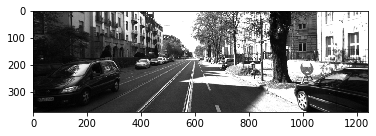

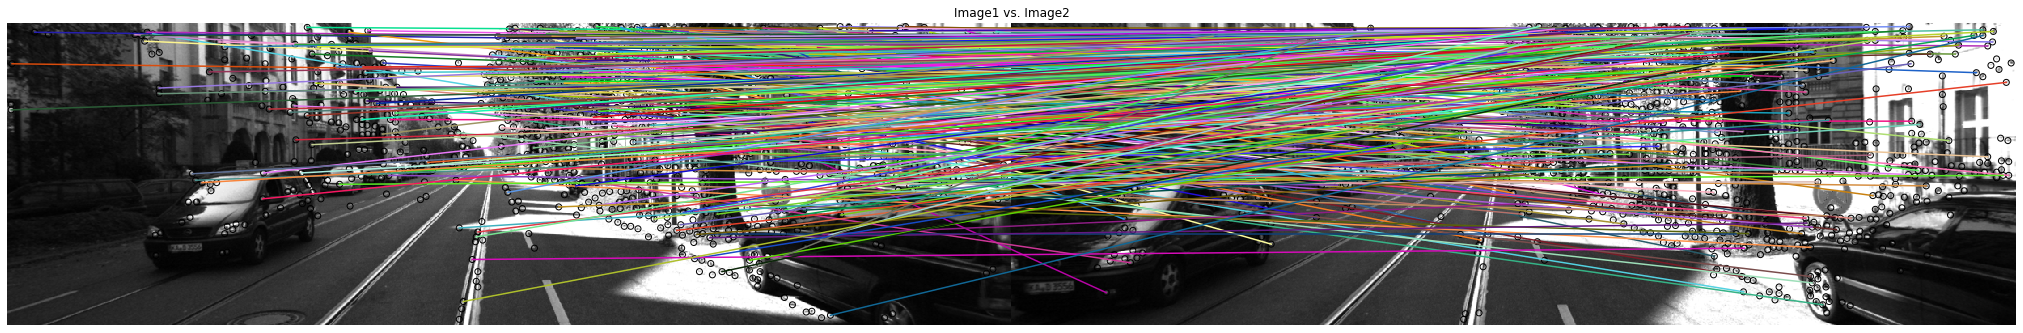

In [7]:
# source: https://github.com/gabilodeau/INF6804/blob/master/Descripteur%20BRIEF.ipynb

img1 = io.imread('KITTI/data_scene_flow/training/image_2/000000_10.png', as_gray= True)
img2 = io.imread('KITTI/data_scene_flow/training/image_2/000000_11.png', as_gray= True)
plt.imshow(img2, cmap='gray')
plt.show()

# extracting key points

kps1 = corner_peaks(corner_fast(img1), min_distance=5)
kps2 = corner_peaks(corner_fast(img2), min_distance=5)

# BRIEF descriptor

extractor = BRIEF(descriptor_size=128, patch_size=5, mode='normal')

extractor.extract(img1, kps1)
descriptor1 = extractor.descriptors
extractor.extract(img2, kps2)
descriptor2 = extractor.descriptors

# matching

matches = match_descriptors(descriptor1, descriptor2, cross_check=True)

# visualization

fig = plt.figure(figsize=(36, 20)) 
ax0 = plt.subplot()
plot_matches(ax0, img1, img2, kps1, kps2, matches)
ax0.axis('off')
ax0.set_title("Image1 vs. Image2")
plt.show()

### SGM disparity estimation

In [ ]:
# Source: https://github.com/beaupreda/semi-global-matching

